In [1]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
from sklearn.preprocessing import PolynomialFeatures

# defree=2
poly = PolynomialFeatures()
poly.fit([[2, 3]])

# 1(bias), 2, 3, 2**2, 2*3, 3**2
# 2, 3은 입력한 그대로, 절편으로 1 추가, 2의 제곱, 3의 제곱, 2와3의 곱
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [3]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# degree = 2
# 자동으로 절편(가중치) 1값이 추가되는 것을 막기 위해 False
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

# (42, 9) -> 42개의 행이 있다는 것을 알 수 있다.
print(train_poly.shape)

# 각 항목의 제곱과 항목끼리의 곱으로 구성되었음을 볼 수 있다. (degree=2 이기에?!)
poly.get_feature_names()

# train을 변환했으면 test도 변환해야 한다.
test_poly = poly.transform(test_input)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

(42, 9)
0.9903183436982124
0.9714559911594132


In [4]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# degree = 5 값을 줬기에 특성이 늘어났다.
# (42, 55) -> 55개의 특성이 만들어졌다.
print(train_poly.shape)

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

# -144.4057..... -> 과대 적합이 되어서 test 결과가 이렇게 나왔다.
# 42개 데이터 밖에 없는데, 특성이 55개이기에 -144가 나올 수 밖에 없다.
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999991096
-144.40579242335605


In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [6]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615398


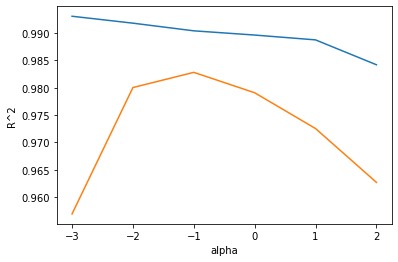

0.9903815817570366
0.9827976465386927


In [7]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# 그래프 범위를 맞춰주기 위해서 (0.001, 0.01, 0.1 등의 간격은 좁고, 뒷부분은 간격이 넓기에 log 함수로...)
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 그래프 왼쪽은 과대 적합, 오른쪽은 과서 적합

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
  
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

In [8]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
  
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# alpha
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
  
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# 55개 특성을 넣었는데, 40개를 사용하지 않는다는 것을 알 수 있다
# 특성x가중치 인데, 가중치를 0으로 준다는 것은 특성을 사용하지 않는다는 것
print(np.sum(lasso.coef_ == 0))

0.9897898972080961
0.9800593698421883
0.9888067471131867
0.9824470598706695
40
